In [1]:
# fashion_mnist
import tensorflow as tf
from tensorflow import keras
import numpy as np

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [2]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [3]:
class MyActivationLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(MyActivationLayer, self).__init__()

    def call(self, inputs):
        return tf.maximum(inputs, 0)

In [6]:
data = tf.convert_to_tensor([[-1.0, 2.0, -5.0, 4.0]], dtype=tf.float32)
print(data)

tf.Tensor([[-1.  2. -5.  4.]], shape=(1, 4), dtype=float32)


In [7]:
layer = MyActivationLayer()
output = layer(data)
print(output)

tf.Tensor([[0. 2. 0. 4.]], shape=(1, 4), dtype=float32)


In [8]:
import tensorflow as tf
import tensorflow.keras as keras

# set seed
tf.random.set_seed(1234)

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(128))

model.add(MyActivationLayer())

model.add(keras.layers.Dense(10))
model.add(tf.keras.layers.Softmax())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 my_activation_layer_2 (MyAc  (None, 128)              0         
 tivationLayer)                                                  
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
# optimizer and loss
opt = tf.keras.optimizers.SGD(0.001)
model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
batch_size = 256
history = model.fit(X_train, y_train, batch_size,
                    validation_data=(X_test, y_test),
                    epochs=5, verbose=2)

Epoch 1/5
235/235 - 2s - loss: 13.1000 - sparse_categorical_accuracy: 0.4712 - val_loss: 1.6003 - val_sparse_categorical_accuracy: 0.5271 - 2s/epoch - 8ms/step
Epoch 2/5
235/235 - 1s - loss: 1.4706 - sparse_categorical_accuracy: 0.5467 - val_loss: 1.4514 - val_sparse_categorical_accuracy: 0.5595 - 1s/epoch - 5ms/step
Epoch 3/5
235/235 - 1s - loss: 1.3392 - sparse_categorical_accuracy: 0.5797 - val_loss: 1.2044 - val_sparse_categorical_accuracy: 0.6489 - 993ms/epoch - 4ms/step
Epoch 4/5
235/235 - 1s - loss: 1.0940 - sparse_categorical_accuracy: 0.6567 - val_loss: 1.1084 - val_sparse_categorical_accuracy: 0.6486 - 1s/epoch - 5ms/step
Epoch 5/5
235/235 - 1s - loss: 0.9749 - sparse_categorical_accuracy: 0.6704 - val_loss: 0.9662 - val_sparse_categorical_accuracy: 0.6711 - 1s/epoch - 4ms/step


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

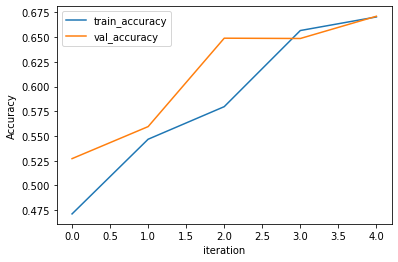

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
model.evaluate(X_test, y_test, batch_size)